**Objective: Split a csv file column 'location' into three seperate columns city, state and country and store result csv file. Finally visualize the csv file data by using PowerBI to create a report *Leading Country Report from 1000 startups funded by Y-combinator till 2024***

Design for given app:
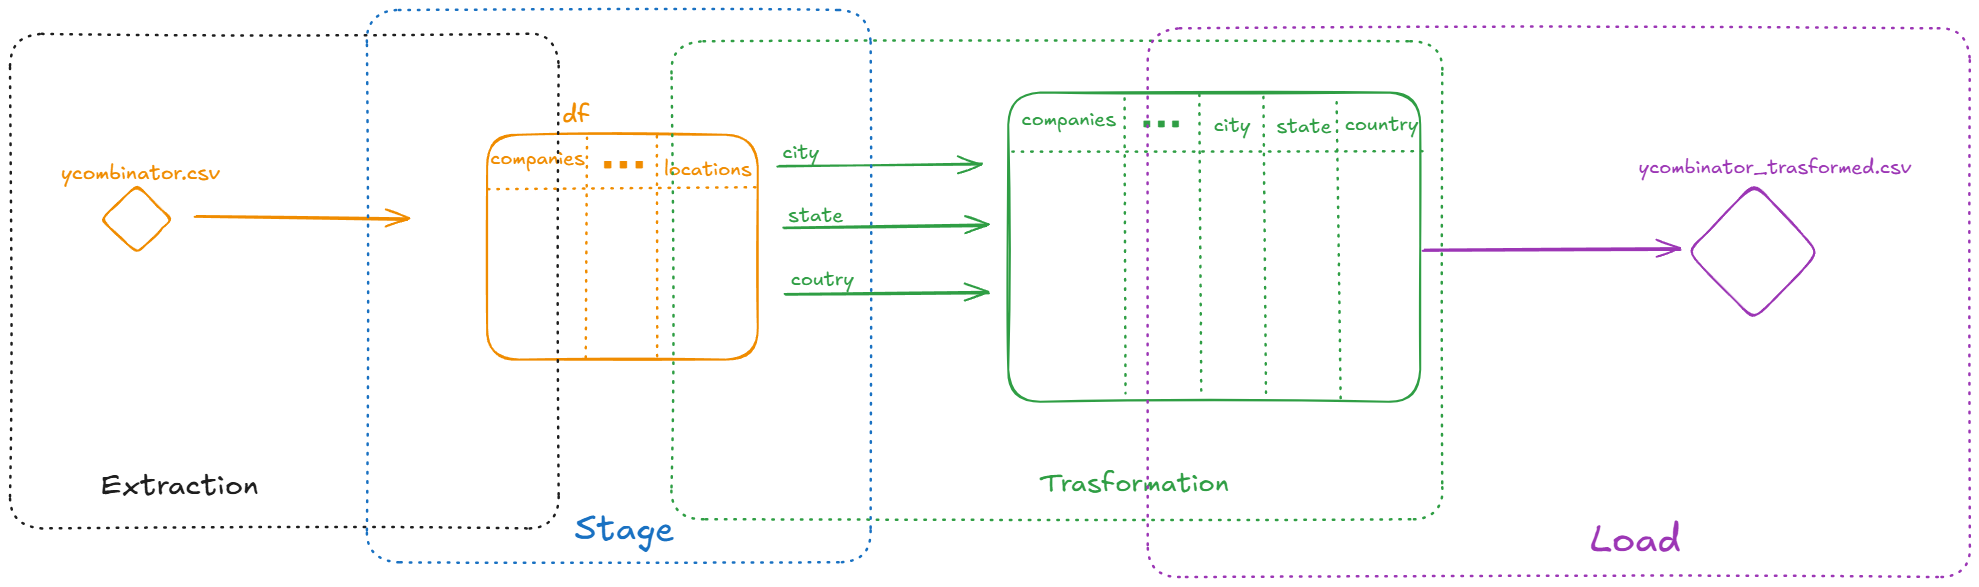

In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

In [2]:
# create spark session
spark = SparkSession.builder.appName("SparkSplitColumnIntoManyPrograms").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/06 04:04:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
# Read CSV File
df = spark.read.csv("/home/sparkuser/data/ycombinator_with_founder_name.csv", header=True)
df.printSchema()

root
 |-- companies: string (nullable = true)
 |-- locations: string (nullable = true)
 |-- descriptions: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- founder_name: string (nullable = true)



In [6]:
df.show()

+---------+--------------------+--------------------+--------------------+--------------+
|companies|           locations|        descriptions|                tags|  founder_name|
+---------+--------------------+--------------------+--------------------+--------------+
|   Airbnb|San Francisco, CA...|Book accommodatio...|W09, Consumer, Tr...|  brian chesky|
|Amplitude|San Francisco, CA...|Digital Analytics...| W12, B2B, Analytics|spenser skates|
+---------+--------------------+--------------------+--------------------+--------------+



In [7]:
from pyspark.sql.functions import split

# Split the values column based on the comma delimiter
split_col = split(df['locations'], ',')

# Add the split columns to the DataFrame
df = df.withColumn('city', split_col.getItem(0))
df = df.withColumn('state', split_col.getItem(1))
df = df.withColumn('country', split_col.getItem(2))

# Drop the original values column
df = df.drop('locations')

In [8]:
df.show()

+---------+--------------------+--------------------+--------------+-------------+-----+-------+
|companies|        descriptions|                tags|  founder_name|         city|state|country|
+---------+--------------------+--------------------+--------------+-------------+-----+-------+
|   Airbnb|Book accommodatio...|W09, Consumer, Tr...|  brian chesky|San Francisco|   CA|    USA|
|Amplitude|Digital Analytics...| W12, B2B, Analytics|spenser skates|San Francisco|   CA|    USA|
+---------+--------------------+--------------------+--------------+-------------+-----+-------+



In [9]:
!whoami

sparkuser


In [25]:
df1 = spark.read.csv("/home/sparkuser/data/ycombinator.csv", header=True).limit(1000)
df1.printSchema()

root
 |-- companies: string (nullable = true)
 |-- locations: string (nullable = true)
 |-- descriptions: string (nullable = true)
 |-- tags: string (nullable = true)



In [26]:
df1.count()

1000

In [27]:
split_col = split(df1['locations'], ',')

df1 = df1.withColumn('city', split_col.getItem(0))
df1 = df1.withColumn('state', split_col.getItem(1))
df1 = df1.withColumn('country', split_col.getItem(2))

df1 = df1.drop('locations')

In [41]:
df1.show()

+------------------+--------------------+--------------------+-------------+-----+-------+
|         companies|        descriptions|                tags|         city|state|country|
+------------------+--------------------+--------------------+-------------+-----+-------+
|            Airbnb|Book accommodatio...|W09, Consumer, Tr...|San Francisco|   CA|    USA|
|         Amplitude|Digital Analytics...| W12, B2B, Analytics|San Francisco|   CA|    USA|
|          Coinbase|Buy, sell, and ma...|S12, Fintech, Ban...|San Francisco|   CA|    USA|
|          DoorDash|Restaurant delivery.|S13, Consumer, Fo...|San Francisco|   CA|    USA|
|           Dropbox|Backup and share ...|S07, B2B, Product...|San Francisco|   CA|    USA|
|   Ginkgo Bioworks|Our mission is to...|S14, Healthcare, ...|       Boston|   MA|    USA|
|            GitLab|A complete DevOps...|W15, B2B, Enginee...|San Francisco|   CA|    USA|
|         Instacart|Marketplace for g...|S12, Consumer, Fo...|San Francisco|   CA|    USA|

In [58]:
df1.select('tags').limit(5).collect()

[Row(tags='W09, Consumer, Travel, Leisure and Tourism'),
 Row(tags='W12, B2B, Analytics'),
 Row(tags='S12, Fintech, Banking and Exchange'),
 Row(tags='S13, Consumer, Food and Beverage'),
 Row(tags='S07, B2B, Productivity')]

In [56]:
df1.write.csv("/home/sparkuser/data/workedon_files", header=True)

I did some manual work on **/home/sparkuser/data/workedon_files/part-00000-f9166dc6-36fb-4a34-b72f-34c21fd91e8a-c000.csv**
1. I did some data cleansing at Power BI side, like telling powerbi to use first row as column.
2. There were ~170 records where country column was empty, I filled it with "Remote"

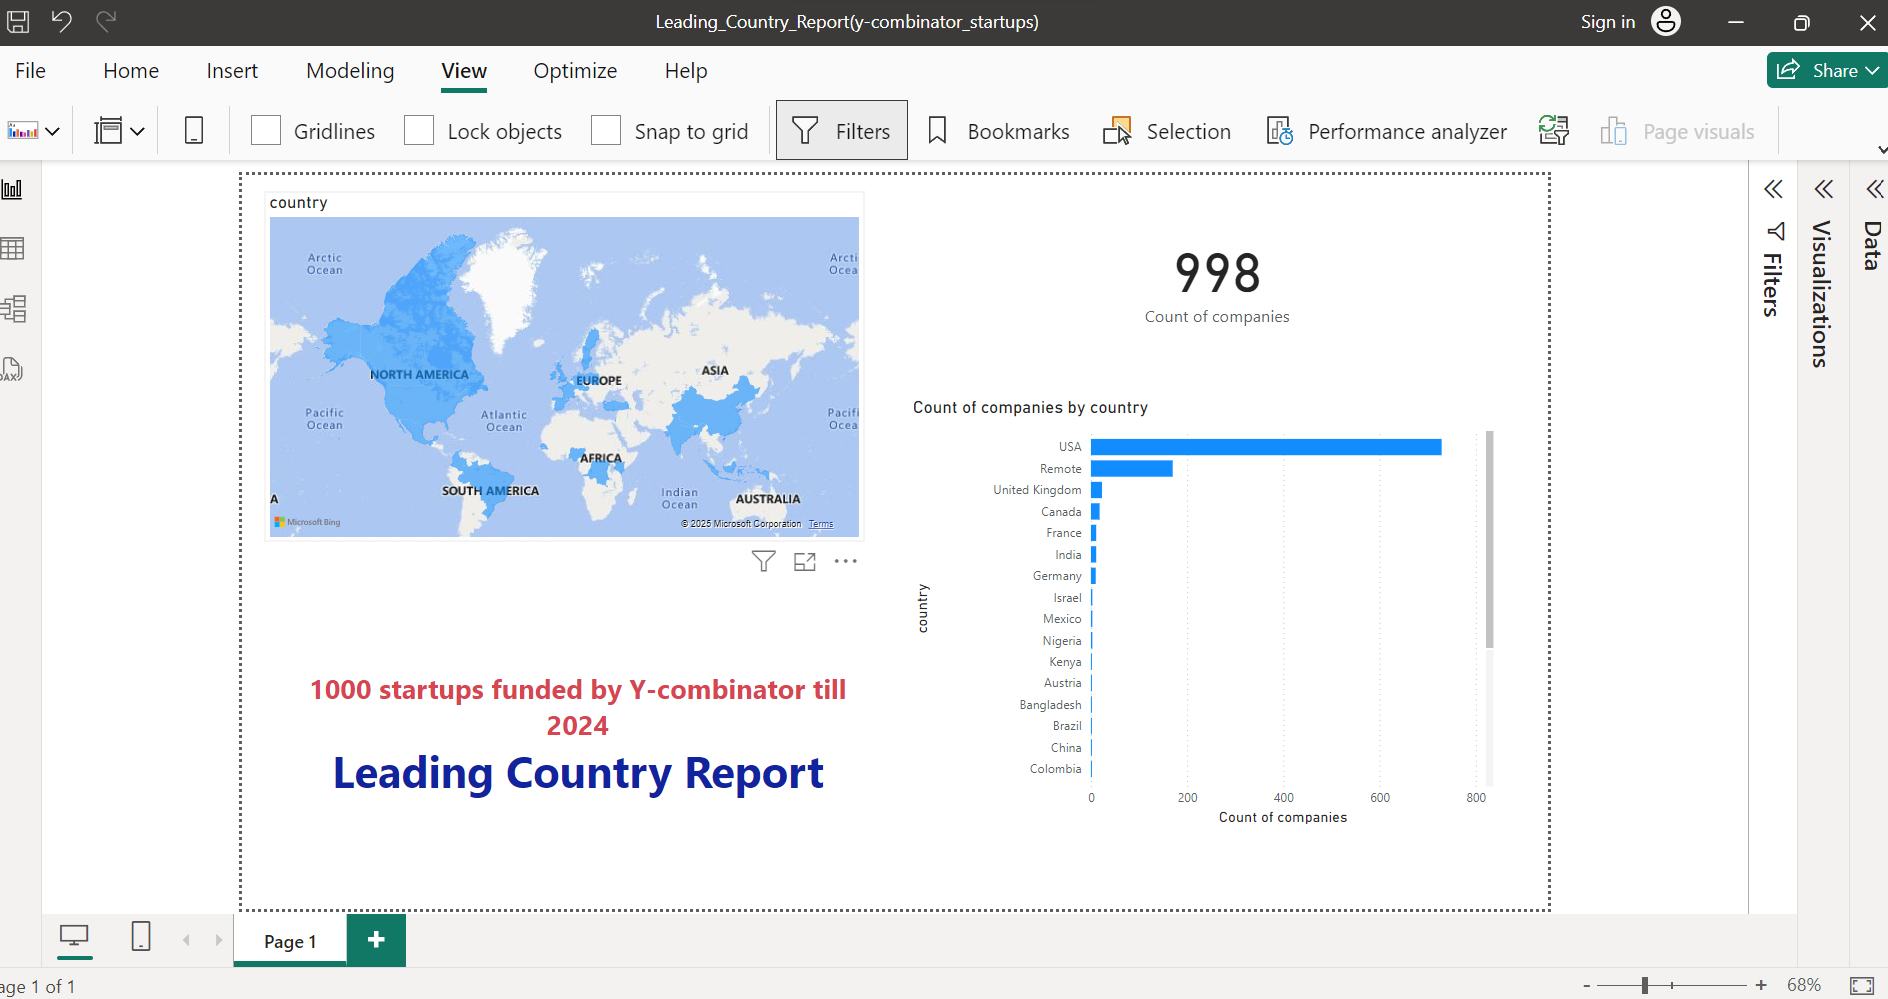